In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

##  Loa Data

In [200]:
data = pd.read_csv("Papa.csv")

# valor por hectarea
data["VPH"] = data.produccion*data.precio

In [201]:
data.Región.unique()

array(['Nacional', 'Amazonas', 'Áncash', 'Apurímac', 'Arequipa',
       'Ayacucho', 'Cajamarca', 'Callao', 'Cusco', 'Huancavelica',
       'Huánuco', 'Ica', 'Junín', 'La Libertad', 'Lambayeque', 'Lima',
       'Lima Metropolitana', 'Loreto', 'papare de Dios', 'Moquegua',
       'Pasco', 'Piura', 'Puno', 'San Martín', 'Tacna', 'Tumbes',
       'Ucayali', 'Madre de Dios'], dtype=object)

In [202]:
data["Región"] = data["Región"].replace({"papare de Dios":"Madre de Dios"})

In [203]:
data = data.drop(columns=["d-m-y"]).groupby(by="Región", as_index=False).mean()

In [195]:
data

,Región,sembrada,cosechada,produccion,rendimiento,precio,VPH
0,Amazonas,319.773542,321.498542,5888.943021,18225.201699,1.444127,8640.387655
1,Apurímac,1955.193750,1857.412500,33746.037854,19298.646969,1.024459,34718.909625
2,Arequipa,744.520833,742.666667,26762.958000,35715.044028,0.950079,26045.559413
3,Ayacucho,2389.250000,2196.854167,36627.250000,16421.797339,1.048415,33966.028333
4,Cajamarca,2464.071875,2410.815625,31548.453917,13187.722202,1.167804,35400.391368
5,Callao,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Cusco,2668.083333,2622.250000,38278.733687,11990.779568,1.003600,45604.047162
7,Huancavelica,2145.541667,2037.229167,26411.140771,13598.261792,0.876789,22204.389064
8,Huánuco,3750.703125,3684.534375,62809.708333,18230.443874,0.983212,61837.718854
9,Ica,284.339583,285.068750,10254.047042,21651.883117,0.970559,10605.905604


In [204]:
data = data[data.Región!="Nacional"].reset_index(level=0, drop=True)
data = data[data.Región!="Lima Metropolitana"].reset_index(level=0, drop=True)

In [197]:
len(data.Región.unique())

25

In [207]:
X = data[[col for col in data.columns if col != "Región"]]
#X = data

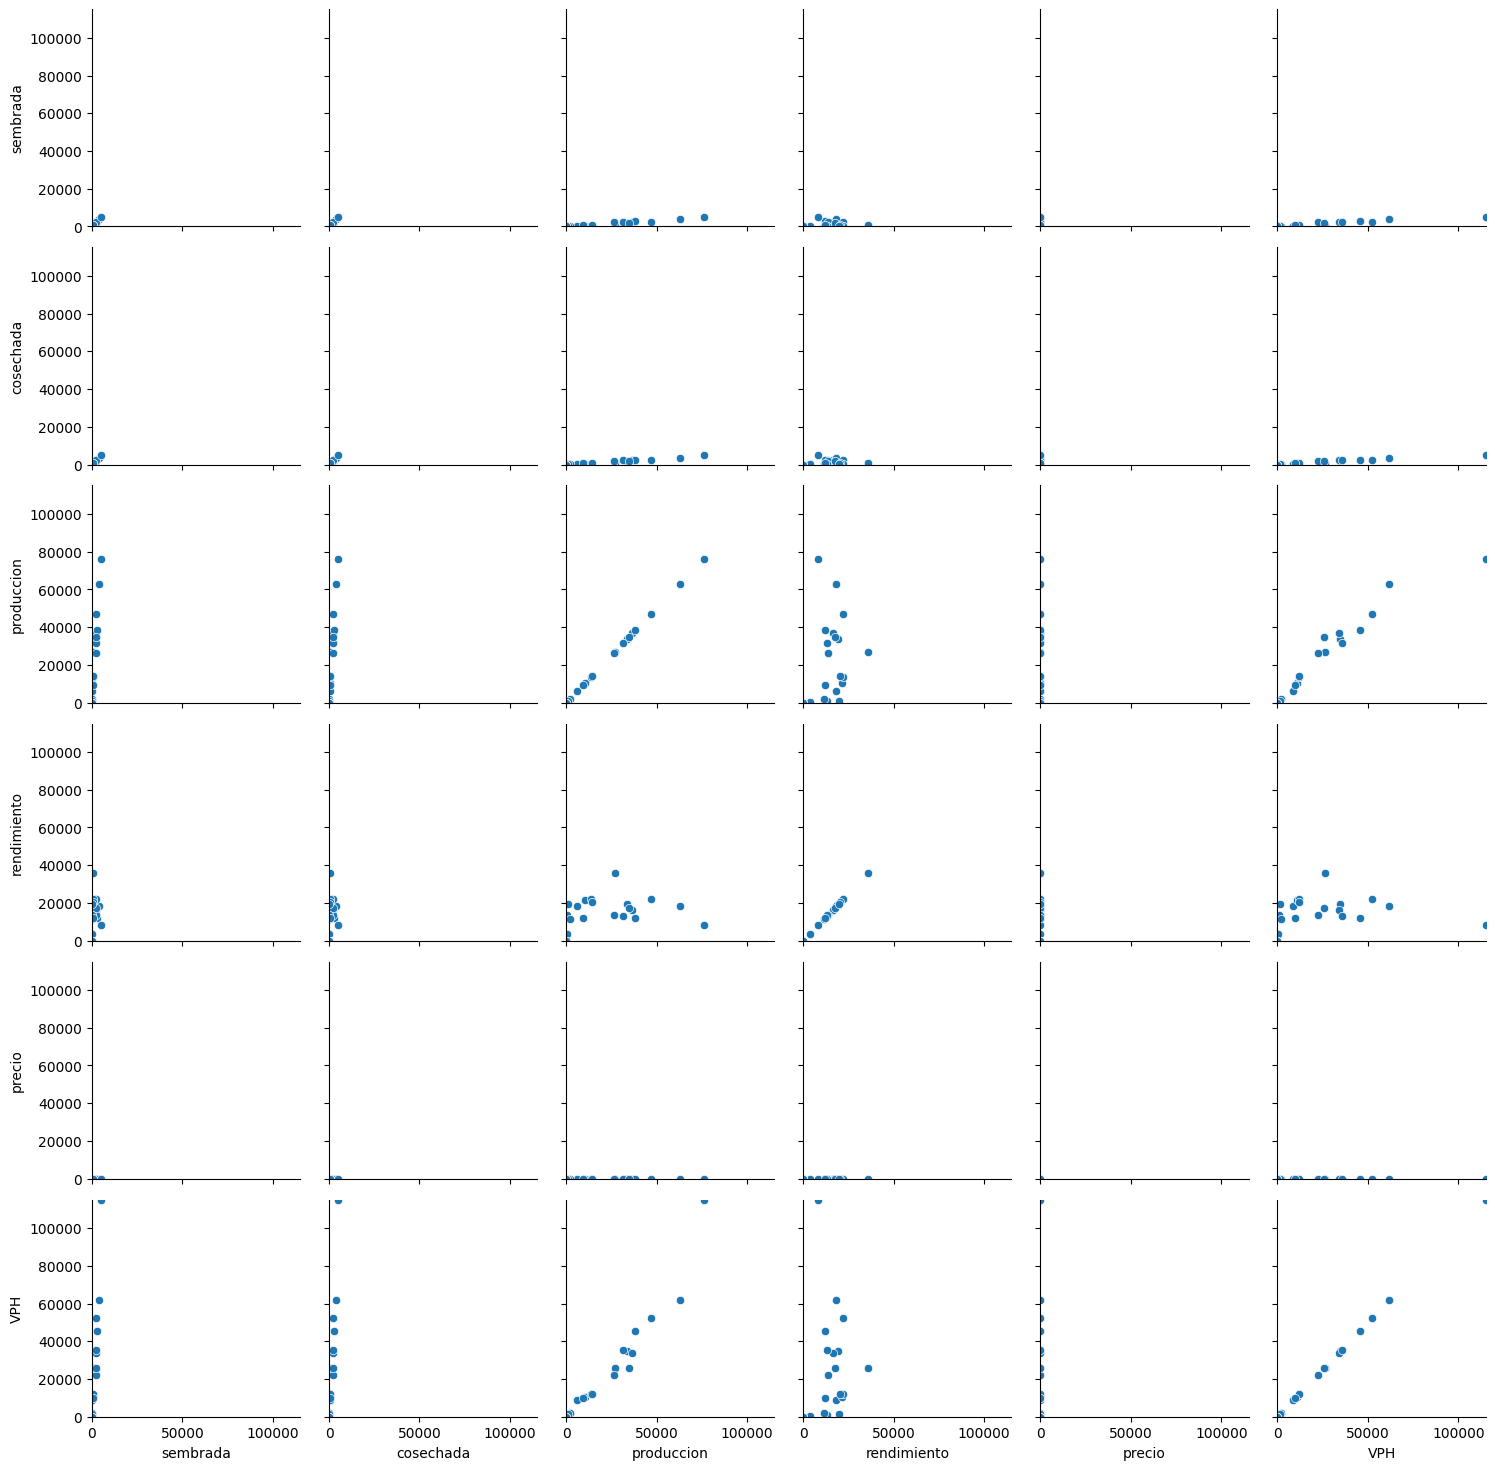

In [89]:
g = sns.PairGrid(X)
g.map(sns.scatterplot)

# Compute global min/max from all features
xmin, xmax = X.min().min(), X.max().max()
ymin, ymax = X.min().min(), X.max().max()

# Apply same scale to all axes
for ax in g.axes.flatten():
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

plt.show()


## Pipeline to scaling

In [208]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
])
pipeline.fit(X=X)

,steps,"[('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


In [209]:
import joblib
joblib.dump(pipeline, "transform_pipeline.pkl")
# import joblib
#pipeline = joblib.load("transform_pipeline.pkl")
# new_data_transformed = pipeline.transform(new_data)


['transform_pipeline.pkl']

In [210]:
X.columns

Index(['sembrada', 'cosechada', 'produccion', 'rendimiento', 'precio', 'VPH'], dtype='object')

In [211]:
X = pipeline.transform(X)

In [212]:
data.columns

Index(['Región', 'sembrada', 'cosechada', 'produccion', 'rendimiento',
       'precio', 'VPH'],
      dtype='object')

In [213]:
df = pd.DataFrame(X,columns=['sembrada', 'cosechada', 'produccion', 'rendimiento', 'precio', 'VPH'])

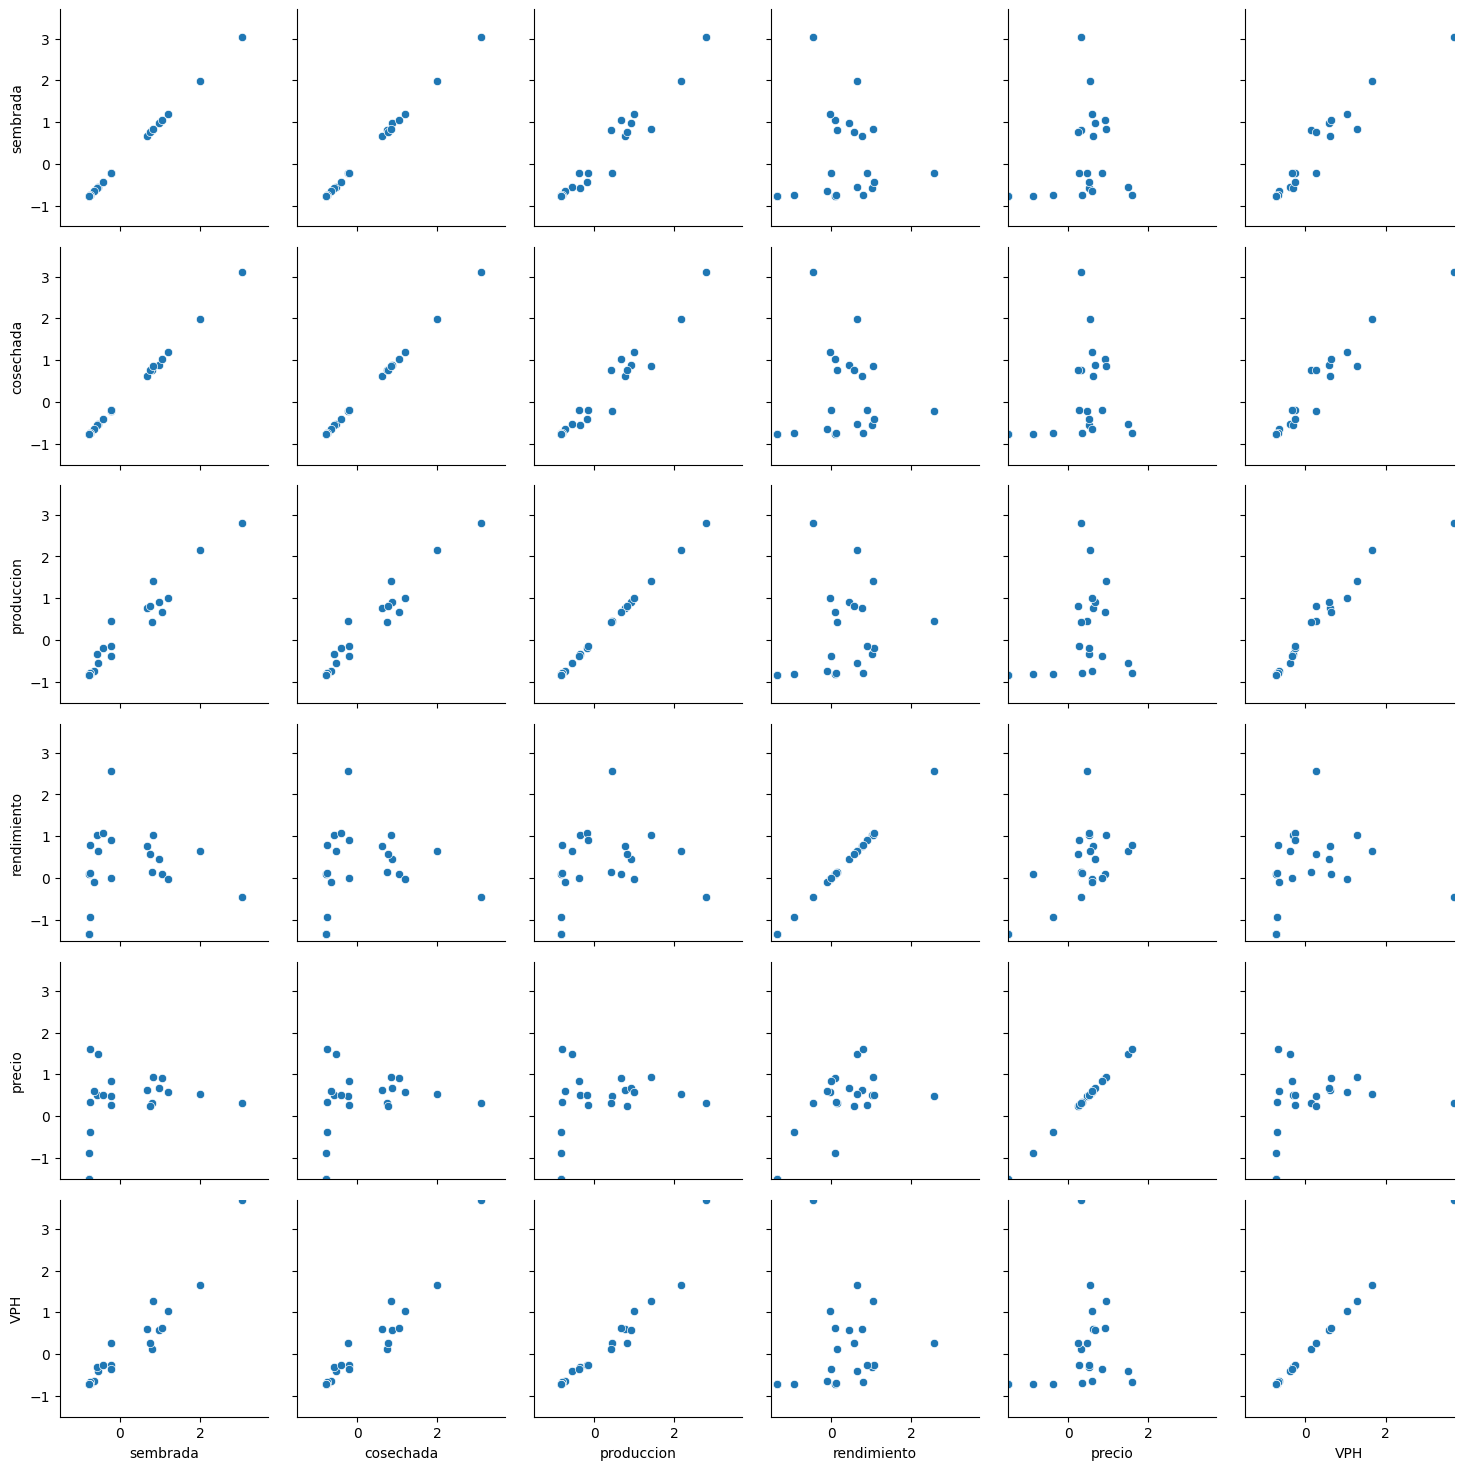

In [96]:
g = sns.PairGrid(df)
g.map(sns.scatterplot)

# Compute global min/max from all features
xmin, xmax = df.min().min(), df.max().max()
ymin, ymax = df.min().min(), df.max().max()

# Apply same scale to all axes
for ax in g.axes.flatten():
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

plt.show()

## Agglomerative Clustering

In [214]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

In [215]:
X.shape

(25, 6)

In [216]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(Z=linkage_matrix, labels= data["Región"].tolist(), orientation="right", **kwargs)


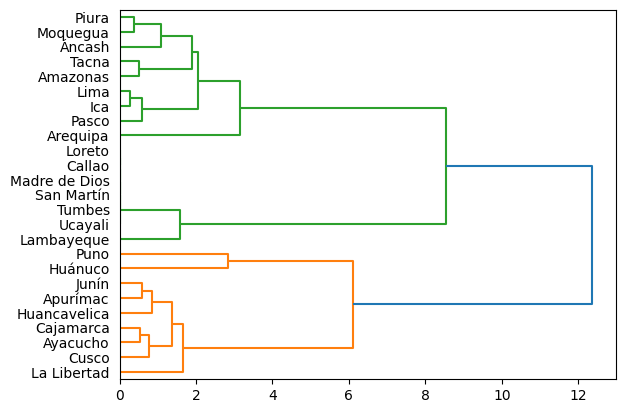

In [217]:
plot_dendrogram(model)

In [101]:
data

,Región,sembrada,cosechada,produccion,rendimiento,precio,VPH
0,Amazonas,319.773542,321.498542,5888.943021,18225.201699,1.444127,8640.387655
1,Apurímac,1955.193750,1857.412500,33746.037854,19298.646969,1.024459,34718.909625
2,Arequipa,744.520833,742.666667,26762.958000,35715.044028,0.950079,26045.559413
3,Ayacucho,2389.250000,2196.854167,36627.250000,16421.797339,1.048415,33966.028333
4,Cajamarca,2464.071875,2410.815625,31548.453917,13187.722202,1.167804,35400.391368
5,Callao,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Cusco,2668.083333,2622.250000,38278.733687,11990.779568,1.003600,45604.047162
7,Huancavelica,2145.541667,2037.229167,26411.140771,13598.261792,0.876789,22204.389064
8,Huánuco,3750.703125,3684.534375,62809.708333,18230.443874,0.983212,61837.718854
9,Ica,284.339583,285.068750,10254.047042,21651.883117,0.970559,10605.905604


In [218]:
model = AgglomerativeClustering(
    n_clusters=None,
    distance_threshold=8,       # number of clusters to form
    metric='euclidean',  # distance measure
    linkage='ward'       # ward, complete, average, single
)

labels = model.fit_predict(X)

In [219]:
data["Cluster"] = model.labels_

In [220]:
data

,Región,sembrada,cosechada,produccion,rendimiento,precio,VPH,Cluster
0,Amazonas,319.773542,321.498542,5888.943021,18225.201699,1.444127,8640.387655,1
1,Apurímac,1955.193750,1857.412500,33746.037854,19298.646969,1.024459,34718.909625,0
2,Arequipa,744.520833,742.666667,26762.958000,35715.044028,0.950079,26045.559413,1
3,Ayacucho,2389.250000,2196.854167,36627.250000,16421.797339,1.048415,33966.028333,0
4,Cajamarca,2464.071875,2410.815625,31548.453917,13187.722202,1.167804,35400.391368,0
5,Callao,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
6,Cusco,2668.083333,2622.250000,38278.733687,11990.779568,1.003600,45604.047162,0
7,Huancavelica,2145.541667,2037.229167,26411.140771,13598.261792,0.876789,22204.389064,0
8,Huánuco,3750.703125,3684.534375,62809.708333,18230.443874,0.983212,61837.718854,0
9,Ica,284.339583,285.068750,10254.047042,21651.883117,0.970559,10605.905604,1


In [221]:
colors_hex = [
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#9467bd",  # purple
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # gray
    "#bcbd22",  # olive
    "#17becf"   # cyan
]

In [221]:
df["Cluster"] = model.labels_

/home/angel/Documents/Produccion-Agricola-Nacional/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/angel/Documents/Produccion-Agricola-Nacional/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/angel/Documents/Produccion-Agricola-Nacional/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/home/angel/Documents/Produccion-Agricola-Nacional/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=Fal

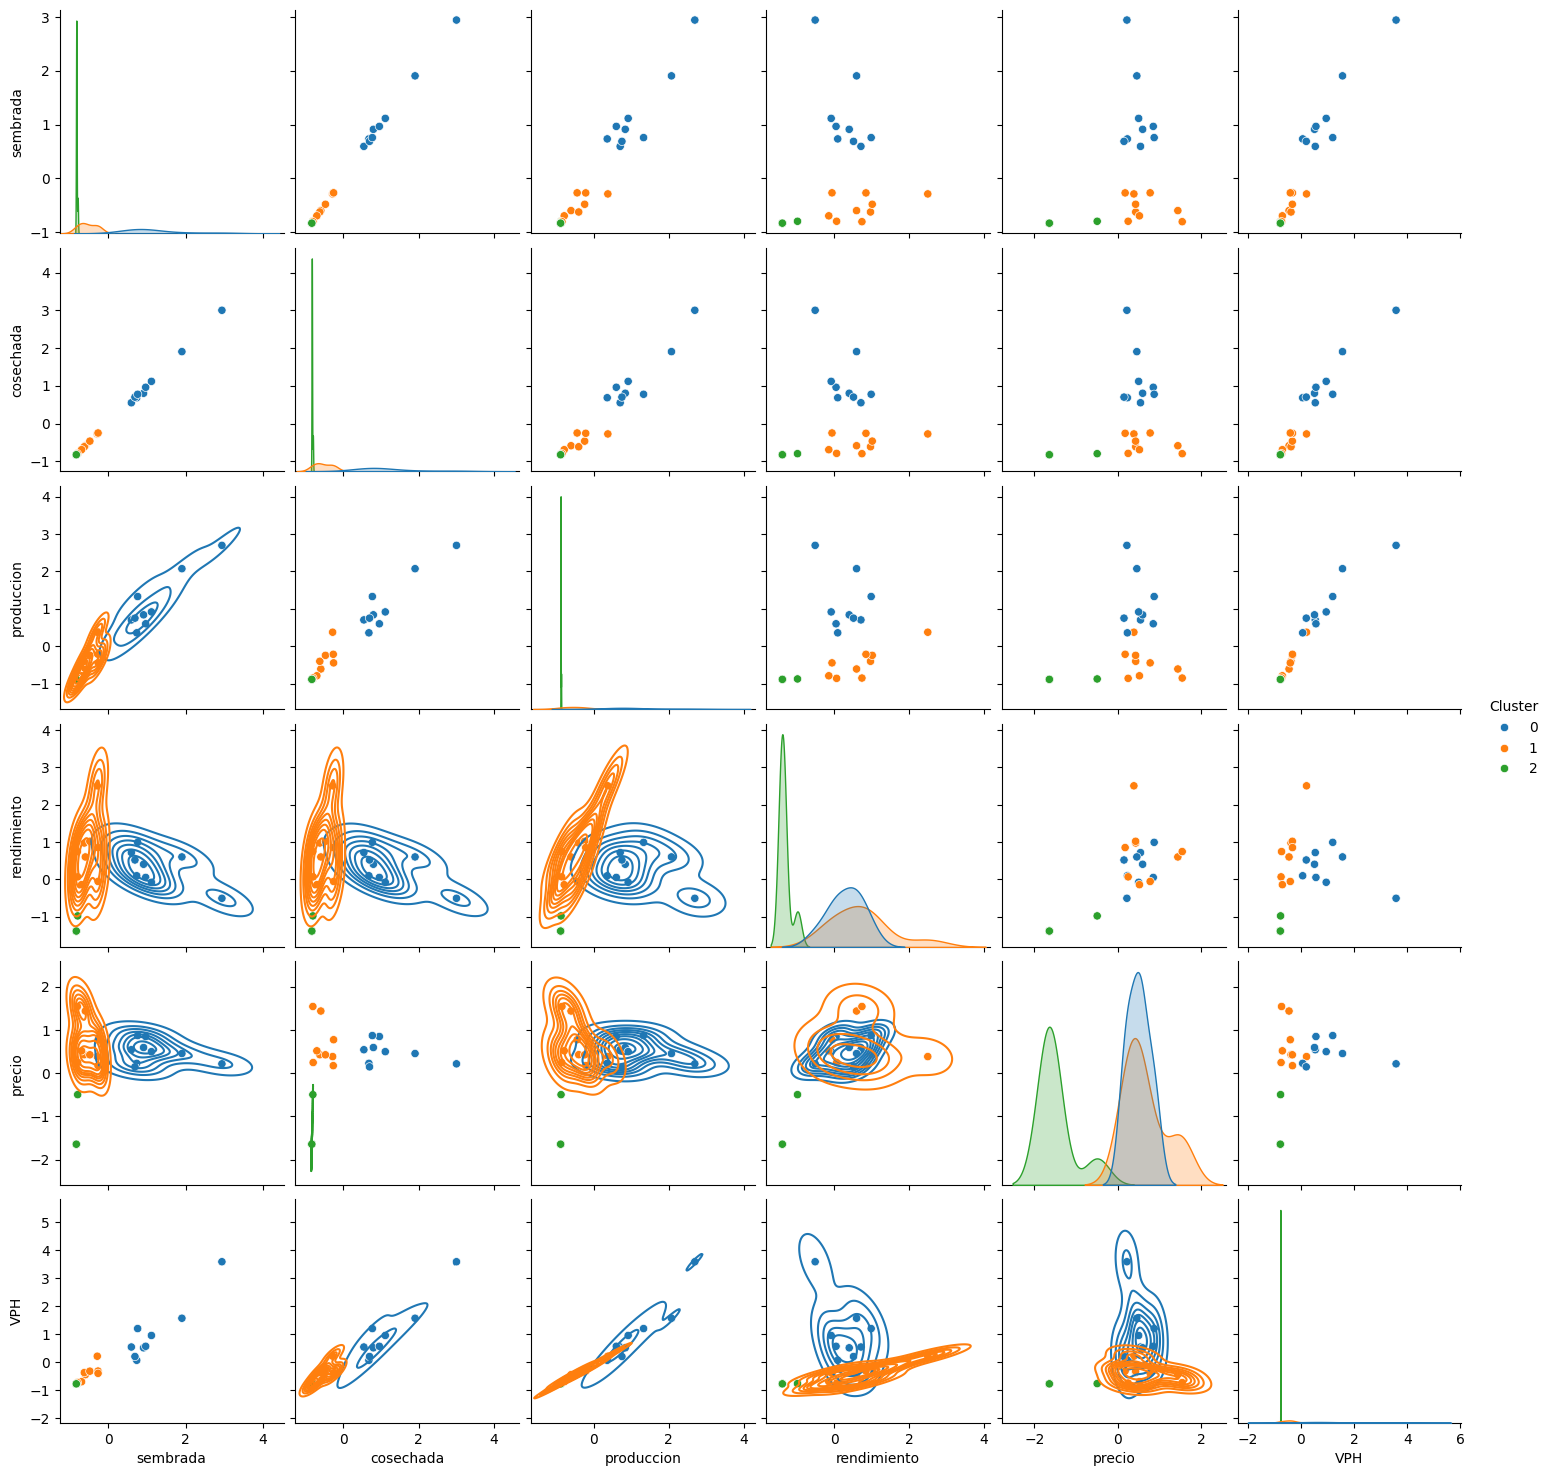

In [222]:
g = sns.pairplot(data=df[[col for col in data.columns if col not in ["Región"]]],
             hue="Cluster",
             palette={0: "#1f77b4",   1: "#ff7f0e",  2:  "#2ca02c"},
             diag_kind="kde"
             )
g.map_lower(sns.kdeplot)

## GEODATA

In [223]:
import geopandas

In [224]:
import zipfile

with zipfile.ZipFile("limites_departamentales.zip") as z:
    print(z.namelist())


['limites_departamentales/', 'limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.cpg', 'limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.dbf', 'limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.prj', 'limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.sbn', 'limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.sbx', 'limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.shp', 'limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.shx']


In [225]:
gdf = geopandas.read_file(
    "zip://limites_departamentales.zip!limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.shp"
)

In [226]:
gdf.NOMBDEP.unique()

array(['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO',
       'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA',
       'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO',
       'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO',
       'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI'], dtype=object)

In [127]:
gdf.NOMBDEP.shape

(25,)

In [128]:
data.Región.shape

(27,)

In [227]:
import unicodedata
def remove_tildes(text):
    return ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )

In [228]:
data["Región"] =  data["Región"].apply(remove_tildes).str.upper().str.strip()

In [229]:
gdf["NOMBDEP"] =  gdf["NOMBDEP"].apply(remove_tildes).str.strip()

In [230]:
missing = data[~data["Región"].isin(gdf["NOMBDEP"])]

print(missing["Región"].unique())


[]


In [231]:
data[~data["Región"].isin(gdf["NOMBDEP"])]

,Región,sembrada,cosechada,produccion,rendimiento,precio,VPH,Cluster


In [130]:
data.iloc[25,0] = "MADRE DE DIOS"

In [233]:
data[data["Región"].isin(gdf["NOMBDEP"])].shape

(25, 8)

In [234]:
data = data.rename(columns={"Región": "NOMBDEP"})

In [235]:
data

,NOMBDEP,sembrada,cosechada,produccion,rendimiento,precio,VPH,Cluster
0,AMAZONAS,319.773542,321.498542,5888.943021,18225.201699,1.444127,8640.387655,1
1,APURIMAC,1955.193750,1857.412500,33746.037854,19298.646969,1.024459,34718.909625,0
2,AREQUIPA,744.520833,742.666667,26762.958000,35715.044028,0.950079,26045.559413,1
3,AYACUCHO,2389.250000,2196.854167,36627.250000,16421.797339,1.048415,33966.028333,0
4,CAJAMARCA,2464.071875,2410.815625,31548.453917,13187.722202,1.167804,35400.391368,0
5,CALLAO,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
6,CUSCO,2668.083333,2622.250000,38278.733687,11990.779568,1.003600,45604.047162,0
7,HUANCAVELICA,2145.541667,2037.229167,26411.140771,13598.261792,0.876789,22204.389064,0
8,HUANUCO,3750.703125,3684.534375,62809.708333,18230.443874,0.983212,61837.718854,0
9,ICA,284.339583,285.068750,10254.047042,21651.883117,0.970559,10605.905604,1


In [245]:
print(data["NOMBDEP"].dtype)
print(gdf["NOMBDEP"].dtype)

object
object


In [236]:
gdf = gdf.merge(data, on=["NOMBDEP"])

In [237]:
gdf.shape

(25, 87)

In [238]:
gdf.columns

Index(['OBJECTID', 'CCDD', 'NOMBDEP', 'FUENTE', 'FUENTE_1', 'POB_PROYEC',
       'POBTOTAL', 'POB_EDAD_T', 'POB_EDAD_1', 'POB_EDAD_E', 'POB_EDAD_2',
       'DENSIDAD', 'POBMASCU', 'POBFEMEN', 'POBMASCU_P', 'POBFEMEN_P',
       'R_MASCULIN', 'POBURBANA', 'POBRURAL', 'POBURBANA_', 'POBRURAL_P',
       'EDAD_PROME', 'EDAD_MEDIA', 'POB_0_14', 'POB_0_14_P', 'POB_15_29',
       'POB_15_29_', 'POB_30_59', 'POB_30_59_', 'POB_60_MAS', 'POB_60_M_1',
       'POB_ANALFA', 'POB_ANAL_1', 'HOMBRES_AN', 'HOMBRES__1', 'MUJERES_AN',
       'MUJERES__1', 'MUJERES_ED', 'MUJERES__2', 'TOTAL_MADR', 'MADRES_SOL',
       'MADRES_S_1', 'MUJERES_AD', 'MADRES_ADO', 'MADRES_A_1', 'AL_MENOS_1',
       'AL_MENOS_2', 'SIN_DISCAP', 'SIN_DISC_1', 'ALGUNA_NBI', 'NBI_PORC',
       'VIV_PARTIC', 'VIV_PART_1', 'VIV_PART_2', 'HOGARES', 'Shape_Leng',
       'Shape_Area', 'IC_INF', 'IC_SUP', 'UBIC_POBMO', 'TOTAL_DEFU',
       'TOTAL_DE_1', 'TOTAL_DE_2', 'NAC_BAJOPE', 'NAC_BAJO_1', 'MUJERES_NA',
       'MUJERES__3', 'HOMBRES_

In [239]:
df = gdf[["NOMBDEP", 'sembrada', 'cosechada', 'produccion', 'rendimiento', 'precio', 'VPH', 'Cluster', 'geometry']].copy()

In [240]:
df.NOMBDEP.unique()

array(['AMAZONAS', 'ANCASH', 'APURIMAC', 'AREQUIPA', 'AYACUCHO',
       'CAJAMARCA', 'CALLAO', 'CUSCO', 'HUANCAVELICA', 'HUANUCO', 'ICA',
       'JUNIN', 'LA LIBERTAD', 'LAMBAYEQUE', 'LIMA', 'LORETO',
       'MADRE DE DIOS', 'MOQUEGUA', 'PASCO', 'PIURA', 'PUNO',
       'SAN MARTIN', 'TACNA', 'TUMBES', 'UCAYALI'], dtype=object)

In [241]:
mapping = {
    0: "A",
    1: "B",
    2: "C",
}
from matplotlib.colors import ListedColormap

colors = [
    "#1f77b4",  # color for category 0
    "#ff7f0e",  # color for category 1
    "#2ca02c",  # color for category 2
]

cmap = ListedColormap(colors)


df["ClusterLabel"] = df["Cluster"].map(mapping)

In [147]:
gdf = geopandas.read_file(
    "zip://limites_departamentales.zip!limites_departamentales/DEPARTAMENTOS_inei_geogpsperu_suyopomalia.shp"
)

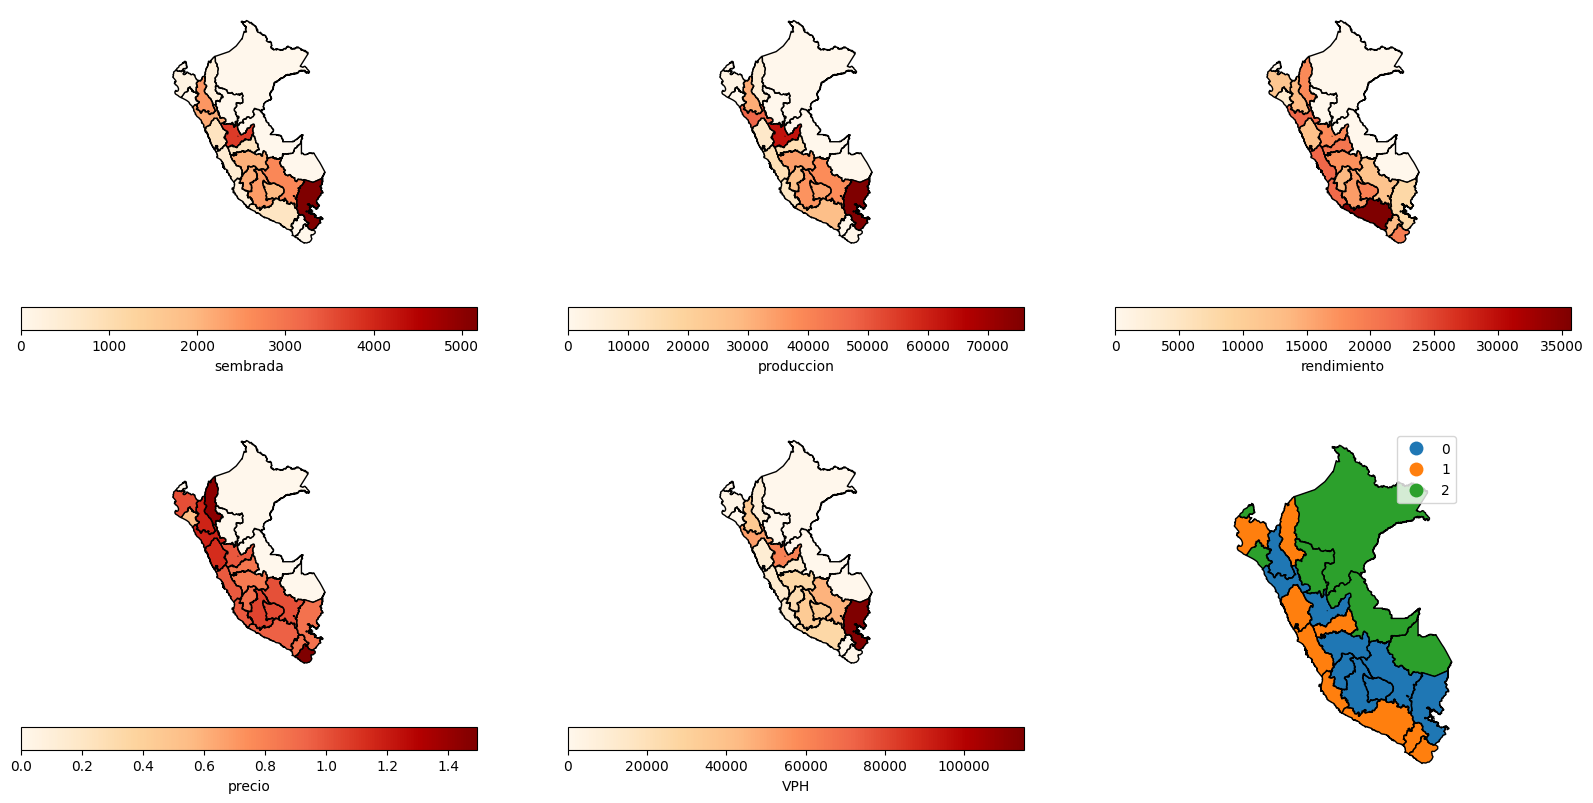

In [242]:
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20,10))

for cat, ax in zip(['sembrada', 'produccion', 'rendimiento', 'precio', 'VPH','Cluster'], axes.ravel()): 
    ax.set_axis_off() 
    if cat == "Cluster":
        df.plot(column=cat,
                ax=ax,
                legend=True, 
                categorical=True,
                cmap=cmap,
                linewidth=1,
                edgecolor="black"
                )
    else:
        df.plot(column=cat,
                ax=ax,
                linewidth=1,
                edgecolor="black",
                legend=True, 
                cmap='OrRd',
                categorical=False,
                legend_kwds={"label": cat, "orientation": "horizontal"})


## Gaussian Misture

In [243]:
from sklearn.mixture import GaussianMixture

In [266]:
bic = []
n_components = range(1,20)
for n in n_components:
    gm = GaussianMixture(n_components=n, random_state=0).fit(X)
    bic.append(gm.bic(X))


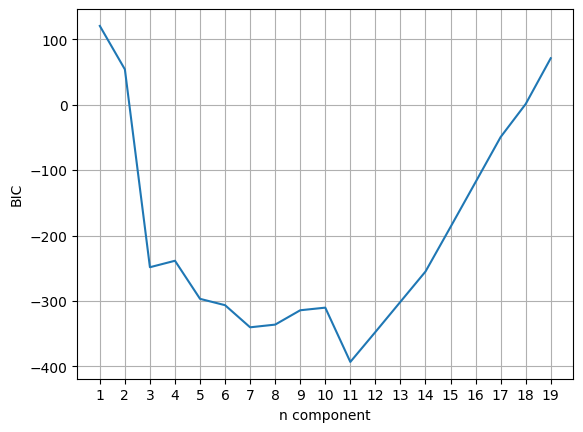

In [272]:
plt.plot(n_components, bic)
plt.xticks(n_components) 
plt.xlabel("n component")
plt.ylabel("BIC")
plt.grid()
plt.savefig("BIC.png")

In [273]:
gm = GaussianMixture(n_components=11, random_state=0).fit(X)

In [274]:
gm.aic(X)

np.float64(-767.233744067848)

In [245]:
X.shape

(25, 6)

In [275]:
df["gm"] = gm.predict(X)

In [160]:
data.shape

(27, 9)

In [251]:
df.head()

,NOMBDEP,sembrada,cosechada,produccion,rendimiento,precio,VPH,Cluster,geometry,ClusterLabel,gm
0,AMAZONAS,319.773542,321.498542,5888.943021,18225.201699,1.444127,8640.387655,1,"POLYGON ((-77.81211 -2.98962, -77.81332 -2.990...",B,0
1,ANCASH,772.208333,777.166667,9361.955833,12191.141669,1.132956,9891.978490,1,"POLYGON ((-77.64692 -8.05086, -77.64669 -8.052...",B,0
2,APURIMAC,1955.193750,1857.412500,33746.037854,19298.646969,1.024459,34718.909625,0,"POLYGON ((-73.74632 -13.17456, -73.7457 -13.17...",A,0
3,AREQUIPA,744.520833,742.666667,26762.958000,35715.044028,0.950079,26045.559413,1,"POLYGON ((-71.98109 -14.64062, -71.98093 -14.6...",B,0
4,AYACUCHO,2389.250000,2196.854167,36627.250000,16421.797339,1.048415,33966.028333,0,"POLYGON ((-74.34843 -12.17503, -74.35 -12.1758...",A,0


In [248]:
df.Cluster.value_counts()

Cluster
1    9
0    9
2    7
Name: count, dtype: int64

In [249]:
df.gm.value_counts()

gm
0    16
2     7
1     2
Name: count, dtype: int64

In [297]:
mapping = {
    0: "A",
    1: "B",
    2: "C",
}

gdf["ClusterLabel"] = gdf["Cluster"].map(mapping)
gdf["gmLabel"] = gdf["gm"].map(mapping)

In [281]:
df = gdf[["NOMBDEP", 'sembrada', 'cosechada', 'produccion', 'rendimiento', 'precio', 'VPH', 'IRV', 'ClusterLabel', 'gmLabel', 'geometry']]

In [ ]:
from matplotlib.colors import ListedColormap

colors = [
    "#1f77b4",  # color for category 0
    "#ff7f0e",  # color for category 1
    "#2ca02c",  # color for category 2
]

cmap = ListedColormap(colors)

<Axes: >

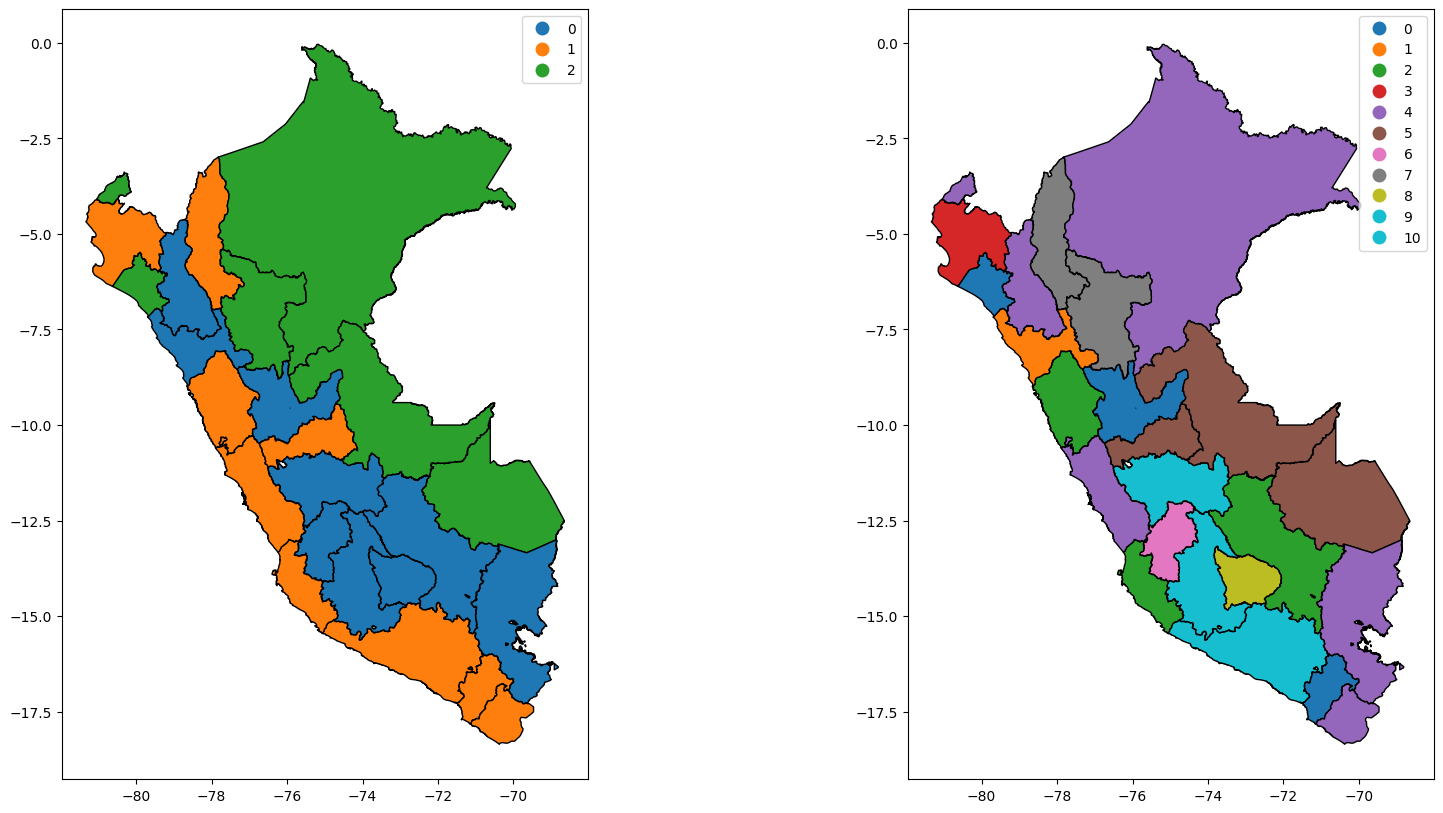

In [276]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(20,10))

df.plot(column="Cluster",
                ax=axes[0],
                legend=True, 
                cmap=cmap,
                categorical=True,
                linewidth=1,
                edgecolor="black"
                )
df.plot(column="gm",
                ax=axes[1],
                legend=True, 
                categorical=True,
                linewidth=1,
                edgecolor="black"
                )



In [280]:
df.columns

Index(['NOMBDEP', 'sembrada', 'cosechada', 'produccion', 'rendimiento',
       'precio', 'VPH', 'Cluster', 'geometry', 'ClusterLabel', 'gm'],
      dtype='object')

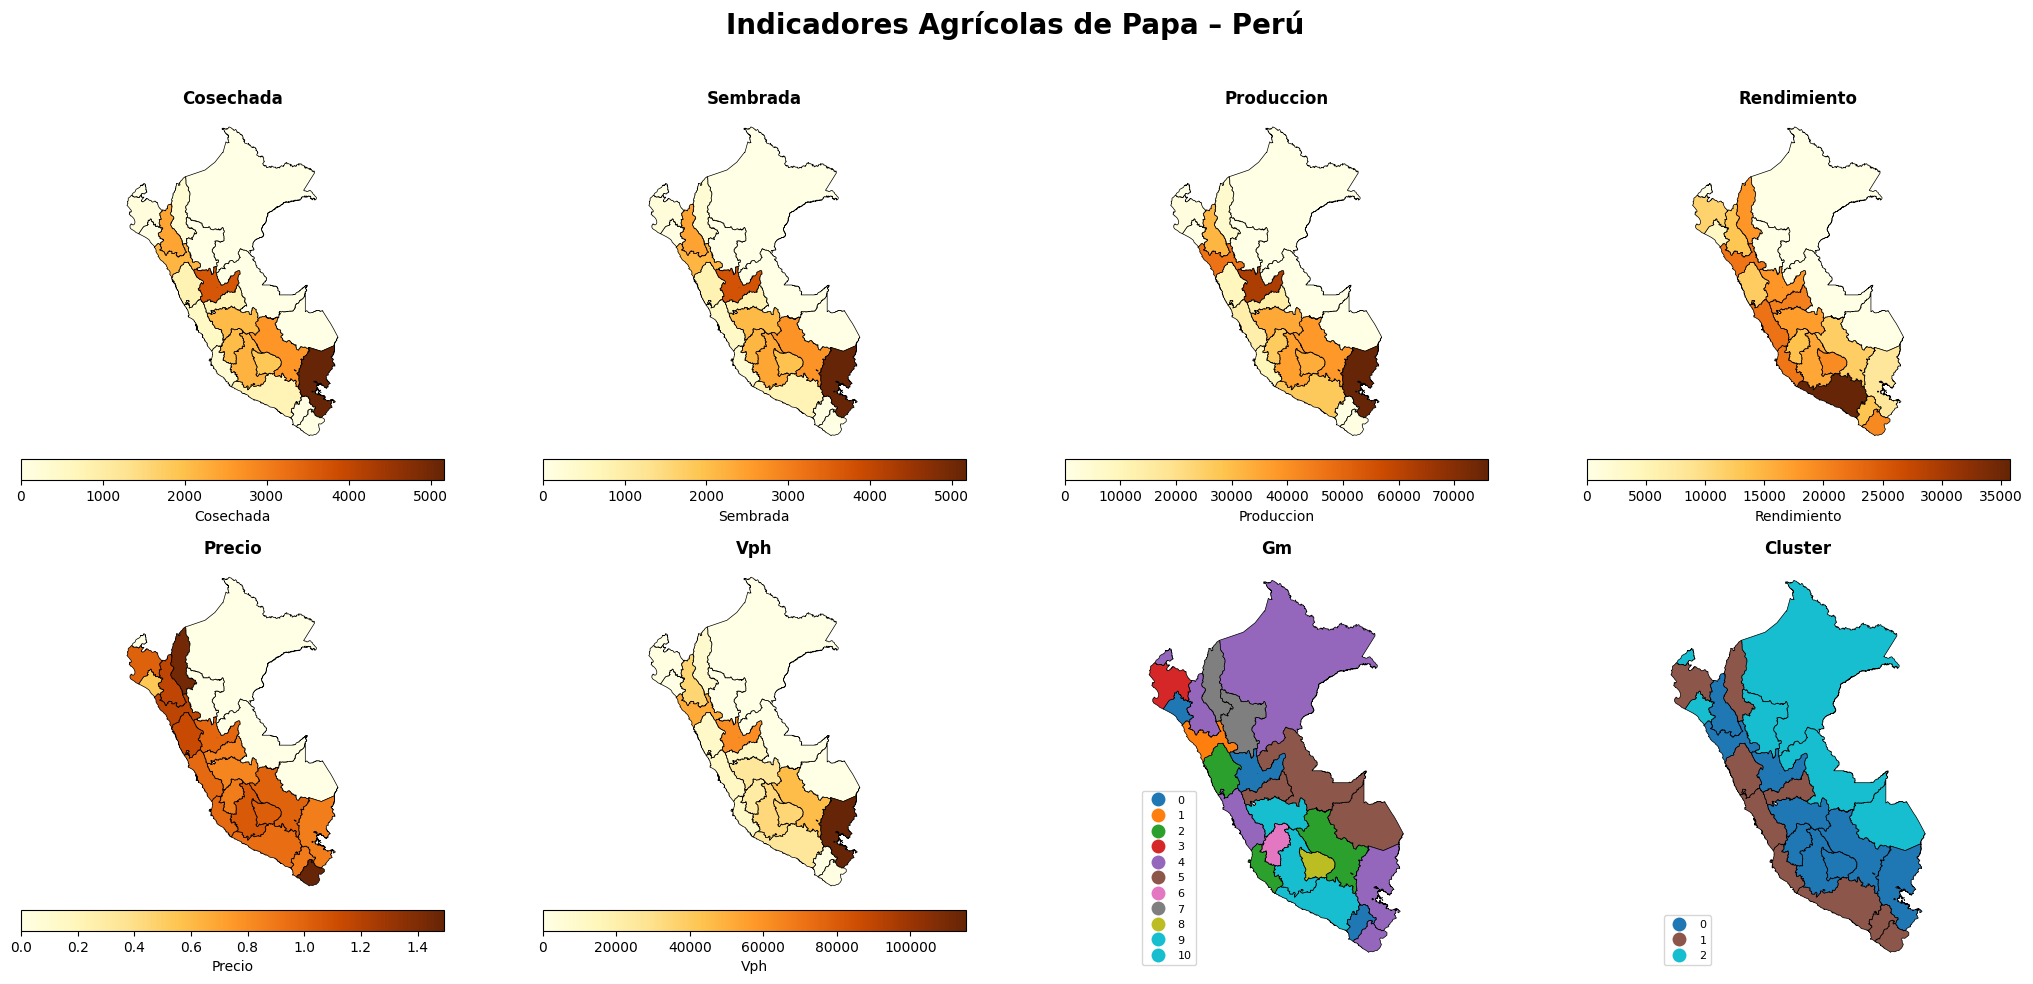

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(22, 10))
fig.suptitle("Indicadores Agrícolas de Papa – Perú", fontsize=20, fontweight="bold")

categorias = ['cosechada', 'sembrada', 'produccion', 'rendimiento',
              'precio', 'VPH', 'gm', 'Cluster']

for cat, ax in zip(categorias, axes.ravel()):
    ax.set_axis_off()
    
    # Título del subplot con mayúscula inicial
    ax.set_title(cat.capitalize(), fontsize=12, fontweight="bold")

    if cat in ["gm", "Cluster"]:
        df.plot(
            column=cat,
            categorical=True,
            legend=True,
            ax=ax,
            linewidth=0.5,
            edgecolor="black",
            legend_kwds={
                "loc": "lower left",
                "fontsize": 8
            }
        )
    else:
        df.plot(
            column=cat,
            cmap="YlOrBr",
            legend=True,
            ax=ax,
            linewidth=0.5,
            edgecolor="black",
            legend_kwds={
                "label": cat.capitalize(),
                "orientation": "horizontal",
                "shrink": 0.7,
                "pad": 0.02
            }
        )

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

